#TP Aprendizaje Automatico Grupo a Automotaizar con FFJ

##Carga de datos

In [ ]:
import pandas as pd
import numpy as np
import math
import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/cabaventa.csv', index_col="id")

In [ ]:
# no usar, por favor
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM-Aprendizaje_automatico/TP1/cabaventa.csv', index_col="id")

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ad_type', 'start_date', 'end_date',
       'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms',
       'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price',
       'currency', 'price_period', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [ ]:
df.shape

(183810, 26)

In [ ]:
i = "price"

print(df[i].describe()) 
a = df[i].unique()
print(sorted(a))

count    1.804180e+05
mean     2.967191e+05
std      8.512916e+05
min      0.000000e+00
25%      9.900000e+04
50%      1.590000e+05
75%      2.800000e+05
max      1.110000e+08
Name: price, dtype: float64
[0.0, 11.0, 4500.0, 5000.0, 6000.0, 6500.0, 7000.0, 7400.0, 7500.0, 7800.0, 8000.0, 8500.0, 8789.0, 8800.0, 8900.0, 9000.0, 9500.0, 9900.0, 10000.0, 10378.0, 10500.0, 10800.0, 10900.0, 11000.0, 11111.0, 11500.0, 11900.0, 12000.0, 12500.0, 12501.0, 12800.0, 12900.0, 12999.0, 13000.0, 13167.0, 13500.0, 13860.0, 13900.0, 14000.0, 14500.0, 14700.0, 14791.0, 14800.0, 14900.0, 14999.0, 15000.0, 15300.0, 15500.0, 15800.0, 15900.0, 16000.0, 16200.0, 16500.0, 16800.0, 16900.0, 17000.0, 17200.0, 17400.0, 17500.0, 17900.0, 17995.0, 18000.0, 18300.0, 18500.0, 18720.0, 18800.0, 18900.0, 19000.0, 19200.0, 19500.0, 19800.0, 19900.0, 19988.0, 19990.0, 19999.0, 20000.0, 20160.0, 20196.0, 20500.0, 20590.0, 20800.0, 20900.0, 21000.0, 21500.0, 21600.0, 21700.0, 21900.0, 22000.0, 22180.0, 22200.0, 22500.0,

In [ ]:
print(df.shape)
df.drop(df[(df['price'] < 1000) | (df['bedrooms'] < 0)].index, inplace=True)
print(df.shape)

(183810, 26)
(183523, 26)


In [ ]:
df.loc[df["price"]==0]

,Unnamed: 0,Unnamed: 0.1,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
id,,,,,,,,,,,,,,,,,,,,,


##Limpieza y categorización

Solo se tomaran en cuenta los precios en USD.

In [ ]:
df.currency.value_counts()

USD    179801
ARS       330
Name: currency, dtype: int64

In [ ]:
df=df[df.currency=='USD']

In [ ]:
df.price.quantile(0.33)

118000.0

In [ ]:
df.price.quantile(0.66)

220000.0

In [ ]:
df.price.quantile(1)

35000000.0

In [ ]:
def Clasificador(x):
    ret = 'Bajo'
    if (x > 220000.0):
        ret = 'Alto'
    elif (x > 118000.0):
        ret = 'Medio'

    return ret

df['priceclas'] = df.price.apply(Clasificador)
df.priceclas.value_counts()

Alto     60375
Bajo     59995
Medio    59431
Name: priceclas, dtype: int64

In [ ]:
df.priceclas.value_counts()

Alto     60375
Bajo     59995
Medio    59431
Name: priceclas, dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ad_type', 'start_date', 'end_date',
       'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms',
       'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price',
       'currency', 'price_period', 'title', 'description', 'property_type',
       'operation_type', 'priceclas'],
      dtype='object')

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,priceclas
id,,,,,,,,,,,,,,,,,,,,,
hjHZd/BZqSBy3zb+RrqPYg==,43,137,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.638910,-58.476073,Argentina,Capital Federal,...,372.0,NaN,450000.0,USD,Mensual,Exclente lote !!,"Lote 365 mts 8,90 x 43 mts C3 II.. FOT 3.6 PAR...",Lote,Venta,Alto
2KF4gGpEVoyqnMVFBcF7IA==,44,149,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.562124,-58.464449,Argentina,Capital Federal,...,NaN,NaN,20000.0,USD,Mensual,Excelente cochera fija y cubierta en edificio ...,"Muy buena cochera, en el 4to piso en excelente...",Cochera,Venta,Bajo
BRbo9ohkAnogBN3vgcbh1Q==,45,153,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.598112,-58.400784,Argentina,Capital Federal,...,265.0,265.0,600000.0,USD,Mensual,Oficina comercial · 265m² · 2 Cochera,Gran Oportunidad! Unica piso de oficinas de 26...,Oficina,Venta,Alto
twX40kvJoG1MI6LVXnRKpA==,46,154,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.614123,-58.378985,Argentina,Capital Federal,...,150.0,150.0,195000.0,USD,Mensual,Importante Oficina en Micro centro de 150 m2.,Importante Oficina de de 150 m2 con palier pr...,Oficina,Venta,Medio
+KGGxikZuWylLGEfAS1QQQ==,47,155,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.603233,-58.385218,Argentina,Capital Federal,...,NaN,12.0,22000.0,USD,Mensual,Oficina - San Nicolas,VENTA DE OFICINA A METROS DEL PALACIO DE TRIBU...,Oficina,Venta,Bajo


##Atributos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179801 entries, hjHZd/BZqSBy3zb+RrqPYg== to fJLVUIziPl31ACoaE/fj1g==
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       179801 non-null  int64  
 1   Unnamed: 0.1     179801 non-null  int64  
 2   ad_type          179801 non-null  object 
 3   start_date       179801 non-null  object 
 4   end_date         179801 non-null  object 
 5   created_on       179801 non-null  object 
 6   lat              168743 non-null  float64
 7   lon              168743 non-null  float64
 8   l1               179801 non-null  object 
 9   l2               179801 non-null  object 
 10  l3               178179 non-null  object 
 11  l4               6996 non-null    object 
 12  l5               0 non-null       float64
 13  l6               0 non-null       float64
 14  rooms            153137 non-null  float64
 15  bedrooms         131719 non-null  float64
 16  ba

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,priceclas
id,,,,,,,,,,,,,,,,,,,,,
hjHZd/BZqSBy3zb+RrqPYg==,43,137,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.638910,-58.476073,Argentina,Capital Federal,...,372.0,NaN,450000.0,USD,Mensual,Exclente lote !!,"Lote 365 mts 8,90 x 43 mts C3 II.. FOT 3.6 PAR...",Lote,Venta,Alto
2KF4gGpEVoyqnMVFBcF7IA==,44,149,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.562124,-58.464449,Argentina,Capital Federal,...,NaN,NaN,20000.0,USD,Mensual,Excelente cochera fija y cubierta en edificio ...,"Muy buena cochera, en el 4to piso en excelente...",Cochera,Venta,Bajo
BRbo9ohkAnogBN3vgcbh1Q==,45,153,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.598112,-58.400784,Argentina,Capital Federal,...,265.0,265.0,600000.0,USD,Mensual,Oficina comercial · 265m² · 2 Cochera,Gran Oportunidad! Unica piso de oficinas de 26...,Oficina,Venta,Alto
twX40kvJoG1MI6LVXnRKpA==,46,154,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.614123,-58.378985,Argentina,Capital Federal,...,150.0,150.0,195000.0,USD,Mensual,Importante Oficina en Micro centro de 150 m2.,Importante Oficina de de 150 m2 con palier pr...,Oficina,Venta,Medio
+KGGxikZuWylLGEfAS1QQQ==,47,155,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.603233,-58.385218,Argentina,Capital Federal,...,NaN,12.0,22000.0,USD,Mensual,Oficina - San Nicolas,VENTA DE OFICINA A METROS DEL PALACIO DE TRIBU...,Oficina,Venta,Bajo


In [ ]:
df.l1.unique()

array(['Argentina'], dtype=object)

In [ ]:
df.l2.unique()

array(['Capital Federal'], dtype=object)

In [ ]:
df.ad_type.unique()

array(['Propiedad'], dtype=object)

In [ ]:
df.l4.unique()

array([nan, 'Palermo Hollywood', 'Palermo Soho', 'Palermo Chico',
       'Palermo Viejo'], dtype=object)

In [ ]:
df.drop(labels=['l5','l6','l1','l2','l4','currency','ad_type'],inplace=True, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179801 entries, hjHZd/BZqSBy3zb+RrqPYg== to fJLVUIziPl31ACoaE/fj1g==
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       179801 non-null  int64  
 1   Unnamed: 0.1     179801 non-null  int64  
 2   start_date       179801 non-null  object 
 3   end_date         179801 non-null  object 
 4   created_on       179801 non-null  object 
 5   lat              168743 non-null  float64
 6   lon              168743 non-null  float64
 7   l3               178179 non-null  object 
 8   rooms            153137 non-null  float64
 9   bedrooms         131719 non-null  float64
 10  bathrooms        155946 non-null  float64
 11  surface_total    119729 non-null  float64
 12  surface_covered  118273 non-null  float64
 13  price            179801 non-null  float64
 14  price_period     85473 non-null   object 
 15  title            179801 non-null  object 
 16  de

In [ ]:
df.dropna(subset=['price','surface_total','surface_covered'], inplace=True)

##Defino pipeline para imputar y modelo

In [ ]:
# Separate target from predictors
numerical_cols=['rooms', 'bedrooms','surface_total','surface_covered','lat','lon']

categorical_cols=['l3','property_type']
my_cols = categorical_cols + numerical_cols
y = df.priceclas
X = df[my_cols]


# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=42)


                                                                

X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
def log_transform(x):
    return np.log(x + 1)

transformer = FunctionTransformer(log_transform)
numerical_transformer = Pipeline(steps=[('numimputer', SimpleImputer(strategy='mean')),
                                        ])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion= "gini", max_depth=4, random_state=42)

In [ ]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# # Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# # Preprocessing of validation data, get predictions
X_valid['preds'] = my_pipeline.predict(X_valid)

# Evaluate the model
# score = my_pipeline.score(X_train, y_train)
score = f1_score(y_valid, X_valid['preds'], average='weighted')


print('Score:', score)

Score: 0.7600666404831498


In [ ]:
from sklearn.tree import plot_tree


In [ ]:
feature_names = (list(['rooms', 'bedrooms','surface_total','surface_covered','lat','lon']))+list(my_pipeline['preprocessor'].transformers_[1][1]\
    ['onehot'].get_feature_names(categorical_cols))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
feature_names

['rooms',
 'bedrooms',
 'surface_total',
 'surface_covered',
 'lat',
 'lon',
 'l3_Abasto',
 'l3_Agronomía',
 'l3_Almagro',
 'l3_Balvanera',
 'l3_Barracas',
 'l3_Barrio Norte',
 'l3_Belgrano',
 'l3_Boca',
 'l3_Boedo',
 'l3_Caballito',
 'l3_Catalinas',
 'l3_Centro / Microcentro',
 'l3_Chacarita',
 'l3_Coghlan',
 'l3_Colegiales',
 'l3_Congreso',
 'l3_Constitución',
 'l3_Flores',
 'l3_Floresta',
 'l3_Las Cañitas',
 'l3_Liniers',
 'l3_Mataderos',
 'l3_Monserrat',
 'l3_Monte Castro',
 'l3_Nuñez',
 'l3_Once',
 'l3_Palermo',
 'l3_Parque Avellaneda',
 'l3_Parque Centenario',
 'l3_Parque Chacabuco',
 'l3_Parque Chas',
 'l3_Parque Patricios',
 'l3_Paternal',
 'l3_Pompeya',
 'l3_Puerto Madero',
 'l3_Recoleta',
 'l3_Retiro',
 'l3_Saavedra',
 'l3_San Cristobal',
 'l3_San Nicolás',
 'l3_San Telmo',
 'l3_Tribunales',
 'l3_Velez Sarsfield',
 'l3_Versalles',
 'l3_Villa Crespo',
 'l3_Villa Devoto',
 'l3_Villa General Mitre',
 'l3_Villa Lugano',
 'l3_Villa Luro',
 'l3_Villa Ortuzar',
 'l3_Villa Pueyrredón

In [ ]:
X_train.head()

,l3,property_type,rooms,bedrooms,surface_total,surface_covered,lat,lon
id,,,,,,,,
SgY2fAJIV5c0g8UcIb0clQ==,San Cristobal,Departamento,1.0,NaN,30.0,30.0,-34.624126,-58.403915
fTCqt/IO1RdY5EFK0ieGrQ==,Villa Crespo,Departamento,4.0,3.0,136.0,99.0,-34.586263,-58.443766
mTW5QvCep+GyN/tkTmEsvg==,Retiro,Oficina,NaN,NaN,120.0,120.0,-34.601078,-58.379747
+fII76v0gGhGL/Ri2vHE1w==,Villa Crespo,Departamento,1.0,NaN,21.0,18.0,-34.600832,-58.432870
xpOzQD0MeJ3ZzOpi6ycVpg==,Saavedra,Casa,6.0,4.0,250.0,250.0,-34.547927,-58.478794


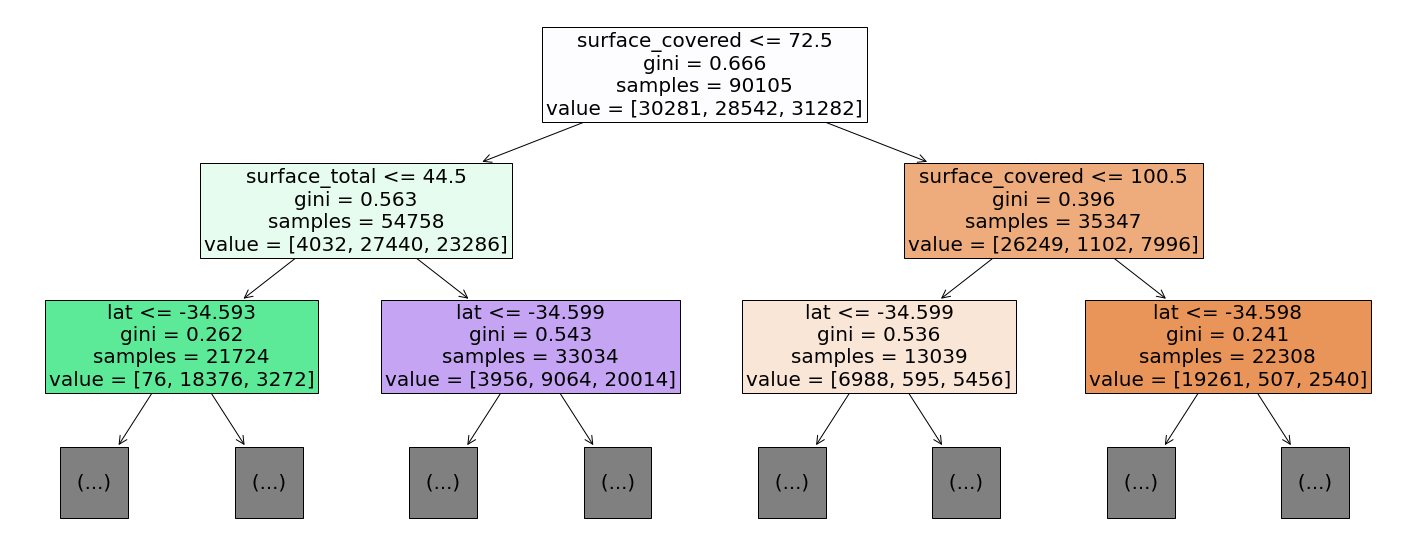

In [ ]:
plt.figure(figsize=(25,10))
plot_tree(my_pipeline['model'],fontsize=20,filled=True,proportion=False, feature_names=feature_names, max_depth=2);

Score utiliza accuaricy como metrica.

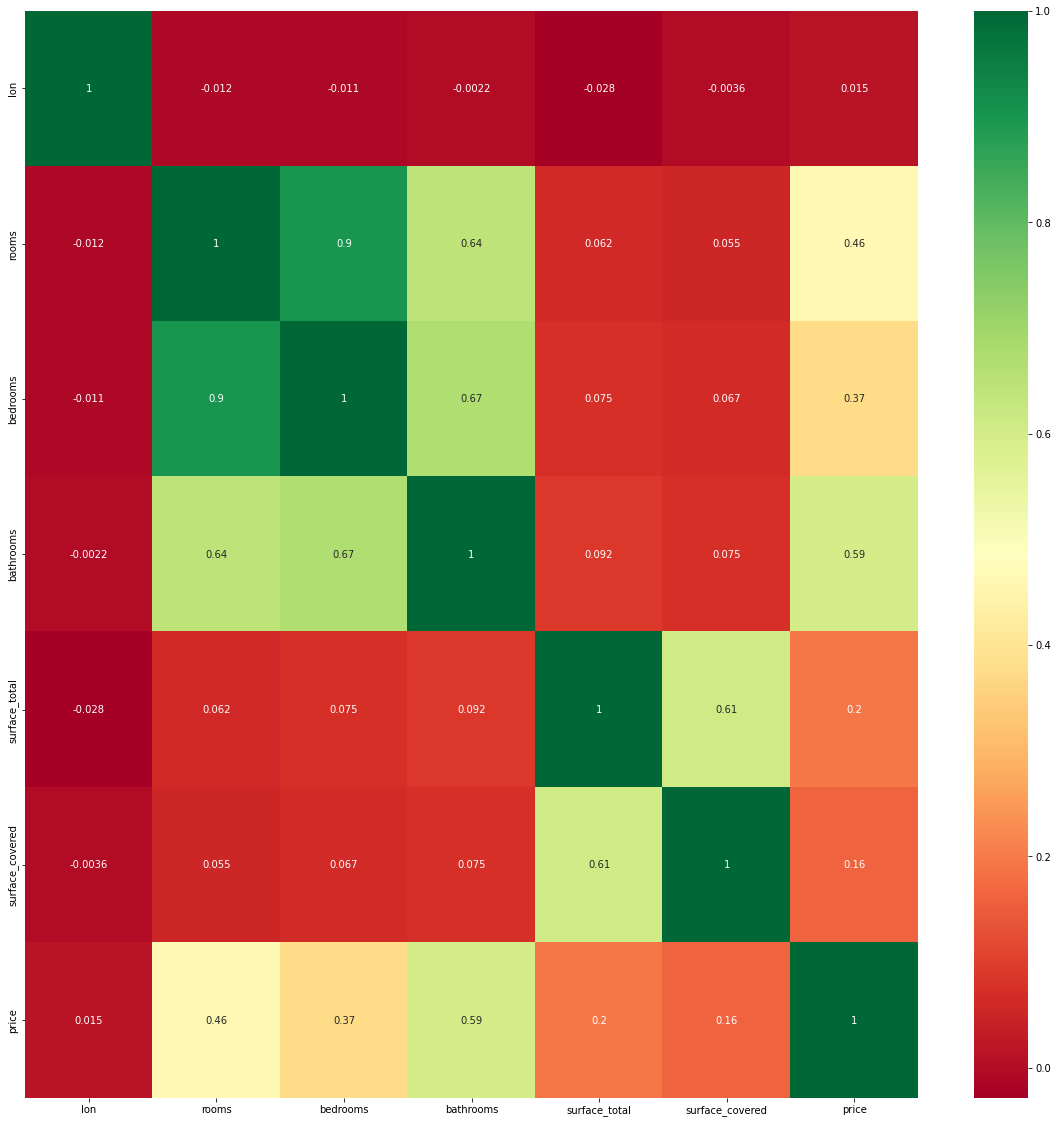

In [ ]:
corr = df.corr()
highly_corr_features = corr.index[abs(corr["price"])>0.01]
plt.figure(figsize=(20,20))
map = sns.heatmap(df[highly_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
y_valid.value_counts()

Medio    7827
Alto     7554
Bajo     7146
Name: priceclas, dtype: int64

Text(33.0, 0.5, 'True')

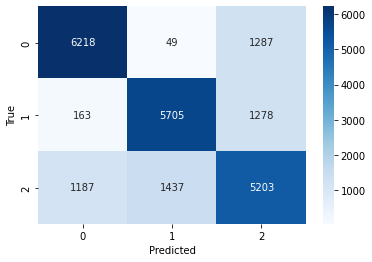

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_valid,X_valid['preds'])
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
# 0 es alto - 1 es bajo - 2 es medio

la mayor cantidad de errores corresponden a medio y bajo, y medio y alto

In [ ]:
feat_imps = my_pipeline['model'].feature_importances_
np.sum(feat_imps)
len(feat_imps)

for feat_imp,feat in reversed(sorted(zip(feat_imps,feature_names))):
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

surface_covered: 0.5836719823454518
surface_total: 0.31392118871965297
lat: 0.0959012436484237
l3_Puerto Madero: 0.006505585286471488


##Variaciones

##F1 score

Tenemos que buscar los parametros del pipeline para poder hacer el grid.

In [ ]:
print(my_pipeline.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'model', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__numimputer', 'preprocessor__num__numimputer__add_indicator', 'preprocessor__num__numimputer__copy', 'preprocessor__num__numimputer__fill_value', 'preprocessor__num__numimputer__missing_values', 'preprocessor__num__numimputer__strategy', 'preprocessor__num__numimputer__verbose', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'preprocessor__cat__verbose', 'preprocessor__cat__imputer', 'preprocessor__cat__onehot', 'preprocessor__cat__imputer__add_indicator', 'preprocessor__cat__imputer__copy', 'preprocessor__cat__imputer__fill_value', 'preprocessor__ca

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer
import numpy as np

# model__criterion
params_grid = {'model__criterion':['gini','entropy'],
               'model__max_depth':list(range(20,80,2)),
               'model__min_samples_leaf':list(range(1,10,1)),
                'model__ccp_alpha': [0, 0.005, 0.01, 0.015, 0.02]}

kfoldcv = StratifiedKFold(n_splits=5)
scorer_fn = make_scorer(f1_score, average='weighted')
randomcv = RandomizedSearchCV(estimator=my_pipeline,param_distributions = params_grid,scoring=scorer_fn,cv=kfoldcv,n_iter=20);
randomcv.fit(X_train,y_train);

Podemos ver cuál fue la mejor combinación de hiperparámetros:

In [ ]:
randomcv.best_params_

{'model__ccp_alpha': 0,
 'model__criterion': 'gini',
 'model__max_depth': 42,
 'model__min_samples_leaf': 1}

In [ ]:
pd.DataFrame(randomcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__min_samples_leaf,param_model__max_depth,param_model__criterion,param_model__ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.704885,0.010782,0.147348,0.003525,6,70,entropy,0,"{'model__min_samples_leaf': 6, 'model__max_dep...",0.817372,0.817703,0.813283,0.816362,0.814918,0.815928,0.001639,3
1,2.929177,0.033267,0.142055,0.002474,5,68,gini,0.02,"{'model__min_samples_leaf': 5, 'model__max_dep...",0.713462,0.711758,0.717891,0.717693,0.717435,0.715648,0.002542,14
2,2.810308,0.039733,0.144319,0.005062,6,56,gini,0.01,"{'model__min_samples_leaf': 6, 'model__max_dep...",0.738456,0.711758,0.717891,0.717693,0.739098,0.724979,0.011481,6
3,3.263579,0.032855,0.145480,0.003018,3,70,gini,0.01,"{'model__min_samples_leaf': 3, 'model__max_dep...",0.738456,0.711758,0.717891,0.717693,0.739098,0.724979,0.011481,6
4,4.021453,0.031256,0.141503,0.002899,1,50,gini,0.015,"{'model__min_samples_leaf': 1, 'model__max_dep...",0.713462,0.711758,0.717891,0.717693,0.717435,0.715648,0.002542,14
5,2.855970,0.274438,0.144020,0.005196,7,68,gini,0.015,"{'model__min_samples_leaf': 7, 'model__max_dep...",0.713462,0.711758,0.717891,0.717693,0.717435,0.715648,0.002542,14
6,2.644999,0.018395,0.147398,0.008747,8,24,gini,0.015,"{'model__min_samples_leaf': 8, 'model__max_dep...",0.713462,0.711758,0.717891,0.717693,0.717435,0.715648,0.002542,14
7,3.455672,0.564724,0.148971,0.004913,2,68,entropy,0,"{'model__min_samples_leaf': 2, 'model__max_dep...",0.821731,0.823792,0.822758,0.821508,0.822417,0.822441,0.000813,2
8,2.629098,0.015442,0.143169,0.004083,9,50,entropy,0.015,"{'model__min_samples_leaf': 9, 'model__max_dep...",0.722353,0.719786,0.722856,0.722046,0.726531,0.722714,0.002179,12
9,2.721547,0.040751,0.142471,0.003926,7,40,gini,0.01,"{'model__min_samples_leaf': 7, 'model__max_dep...",0.738456,0.711758,0.717891,0.717693,0.739098,0.724979,0.011481,6


In [ ]:
best_tree = randomcv.best_estimator_

In [ ]:
# # Preprocessing of training data, fit model 
best_tree.fit(X_train, y_train)

# # Preprocessing of validation data, get predictions
X_valid['preds'] = best_tree.predict(X_valid)

# Evaluate the model
#score = best_tree.score(X_train, y_train)
score = f1_score(y_valid, X_valid['preds'], average='weighted')

print('Score:', score)

Score: 0.83458925223312


para ver la importancia de cada feature (mayores a 0)

In [ ]:
feat_imps = best_tree['model'].feature_importances_
np.sum(feat_imps)
len(feat_imps)

for feat_imp,feat in reversed(sorted(zip(feat_imps,feature_names))):
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

surface_covered: 0.3535418378327179
surface_total: 0.22564928195573397
lat: 0.17289108470038986
lon: 0.12561730758236125
rooms: 0.019189332202512524
bedrooms: 0.016232141910074473
l3_Puerto Madero: 0.012715925653806463
property_type_Departamento: 0.008491316696667967
property_type_PH: 0.005454288524536548
l3_Caballito: 0.004872461088442186
property_type_Local comercial: 0.004324724372895284
l3_Villa Crespo: 0.003920325818092719
l3_Palermo: 0.0038875445051835553
l3_Almagro: 0.003081417719513389
l3_Belgrano: 0.002516992493638625
l3_Recoleta: 0.0021543104396125573
property_type_Oficina: 0.0019140658520252522
l3_Balvanera: 0.0017451317375448269
l3_Barrio Norte: 0.001705855871841847
property_type_Casa: 0.0016121465246570642
l3_San Telmo: 0.0015506330119733401
l3_Flores: 0.0015104800352147135
l3_Monserrat: 0.0013607056898257673
property_type_Lote: 0.0012745318504440632
l3_Villa Urquiza: 0.0011157837644504064
l3_Nuñez: 0.0010405677679997452
l3_San Nicolás: 0.0009802293485696968
property_type_